In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data['flower_name'] = data.target.apply(lambda x: iris.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
data0 = data[data.target == 0]
data1 = data[data.target == 1]
data2 = data[data.target == 2]

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

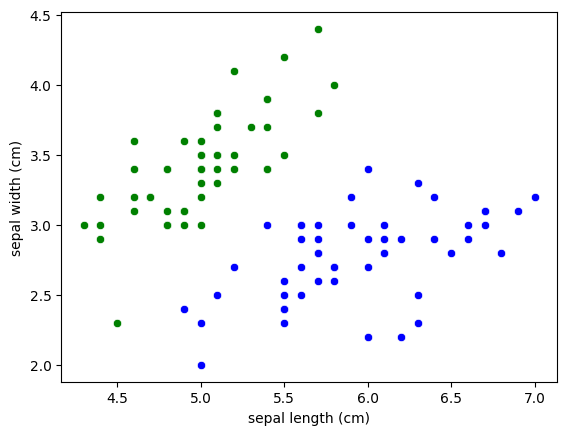

In [6]:
sns.scatterplot(data0, x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'green')
sns.scatterplot(data1, x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'blue')

In [7]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

In [8]:
X = data.drop(['target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = data.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [21]:
knn.score(X_test, y_test)

1.0

In [22]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

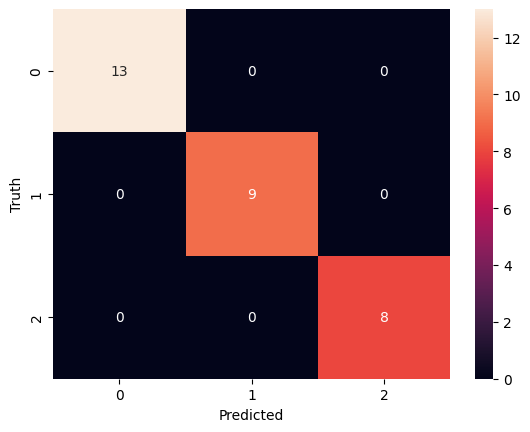

In [27]:
import matplotlib.pyplot as plt
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')